In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('data.csv')

# Data Transformation

In [15]:
df['CAMPAIGN'] = df['CAMPAIGN'].fillna('Other')
df['DATE'] = pd.to_datetime(df['DATE'])

In [16]:
# Grouping the dataframe by ORDER_ID and transforming it into the desired structure efficiently
def aggregate_rows(series):
    return series.tolist()

# Grouping by ORDER_ID and applying the custom aggregation function to each column except for ORDER_ID
transformed_df = df.groupby('ORDER_ID').agg({col: aggregate_rows for col in df.columns if col != 'ORDER_ID'}).reset_index()

# Converting the grouped dataframe back to a dictionary format as requested
transformed_data_efficient = transformed_df.to_dict(orient='records')

# For demonstration, convert it to the format where each ORDER_ID is a key to its own dictionary
transformed_data_dict = {item['ORDER_ID']: {k: v for k, v in item.items() if k != 'ORDER_ID'} for item in transformed_data_efficient}


In [29]:
new_df = pd.DataFrame.from_dict(transformed_data_dict, orient='index') #10317883
new_df['Basket Revenue'] = new_df['Revenue'].apply(lambda x:np.sum(x))
new_df['RSC/VW'] = new_df.apply(lambda row: [a/b for a, b in zip(row['Real_SHC'], row['DESI'])],axis=1)
new_df['R/RSC'] = new_df.apply(lambda row: [a/b for a, b in zip(row['Revenue'], row['Real_SHC'])],axis=1)

In [30]:
new_df

,CARGO_ID,DATE,SKU,PRODUCT_NAME,SUB_CATEGORY,SUB_CATEGORY_CODE,QTY,Seller,DESI,SHIPPING_COMPANY,...,Total_Price,Unit_Price,Revenue,Unit_SHF,Real_SHC,Category,CFreeSH,Basket Revenue,RSC/VW,R/RSC
10000489,[6],[2017-04-25 00:00:00],[TELAKLMIBAND2],[Xiaomi Mi Band 2 Akıllı Bileklik Siyah],[Akıllı Saatler],[3407],[2],[PO],[1.0],[ARS],...,[83.825],[83.825],[167.65],[0.0],[1.2048395435],[TEL1],[False],167.65,[1.2048395435],[139.14715939102143]
10000900,[8],[2017-03-06 00:00:00],[HBV000001SXJP],[Sony Xperia XZ],[Cep Telefonu],[60],[1],[PO],[1.0],[ARS],...,[1873.46],[1863.56],[1873.46],[9.9],[2.089839544],[TEL2],[False],1873.46,[2.089839544],[896.4611686953513]
10001219,[16],[2017-04-26 00:00:00],[HBV000001RJ34],[Sony Uch10 2.0A Hızlı Şarj Cihazı Seti Oem-Si...,[Şarj Cihazları],[534],[1],[MP],[1.0],[YIK],...,[33.97],[28.81],[33.97],[5.16],[3.60062202],[TEL1],[False],33.97,[3.60062202],[9.434480990037382]
10001432,[19],[2017-04-19 00:00:00],[EVUCZLKCLUCKY],[Fakir Lucky Elektirikli Süpürge],[Süpürgeler],[736],[1],[PO],[6.0],[ARS],...,[91.05],[83.89],[91.05],[7.16],[0.119037262],[HEA],[False],91.05,[0.019839543666666667],[764.8865445174637]
10001588,[20],[2017-04-22 00:00:00],[TELAKLCASE4UU8SYH],[Case 4U U8 Siyah iOS ve Android Uyumlu Akıllı...,[Akıllı Saatler],[3407],[1],[PO],[1.0],[ARS],...,[30.5],[25.34],[30.5],[5.16],[2.179839544],[TEL1],[False],30.50,[2.179839544],[13.991855539987396]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99999806,[2444490],[2017-03-01 00:00:00],[PTTROPP14554],[Champion Dana Etli Köpek Maması Çalışan ve Ak...,[Köpek Maması],[2696],[1],[MP],[8.28],[ARS],...,[37.65],[28.73],[37.65],[8.92],[4.935598181],[PET],[False],37.65,[0.5960867368357488],[7.628254695638888]
99999841,"[2444494, 2444494, 2444494]","[2017-03-12 00:00:00, 2017-03-12 00:00:00, 201...","[ZYSAN914883, ZYKRISTAL259168, ZYGUR930225]",[Sarelle Şekersiz Kakaolu Fındık Ezmesi 350 gr...,"[Gıda Ürünü, Organik ve Dogal Ürünler, Gıda Ür...","[3580, 3039, 3580]","[1, 1, 1]","[PO, PO, PO]","[1.0, 5.0, 1.0]","[ARS, ARS, ARS]",...,"[12.01, 98.1, 12.76]","[12.01, 98.1, 12.76]","[12.01, 98.1, 12.76]","[0.0, 0.0, 0.0]","[0.478410972, 2.392054861, 0.478410972]","[BC, BC, BC]","[True, True, True]",122.87,"[0.478410972, 0.4784109722, 0.478410972]","[25.10393929677683, 41.01076509549168, 26.6716..."
99999851,[2444500],[2017-03-13 00:00:00],[ZYECZACI9470372],[Uni Baby Çamaşır Yumuşatıcı 1500 ml],[Deterjan ve Temizlik Malzemeleri],[3507],[2],[PO],[1.0],[ARS],...,[10.3],[7.12],[20.6],[3.18],[1.6248395435],[BC],[False],20.60,[1.6248395435],[12.678174951125566]
99999934,[2444513],[2017-04-08 00:00:00],[ZYPYON9998582],[Ariel Toz Çamaşır Deterjanı Dağ Esintisi 7 Kg...,[Deterjan ve Temizlik Malzemeleri],[3507],[2],[PO],[8.0],[ARS],...,[43.145],[43.145],[86.29],[0.0],[8.283160795],[BC],[False],86.29,[1.035395099375],[10.417520815494443]


In [27]:
new_df.loc[10317883]

CARGO_ID             [2890, 2890, 2890, 2890, 2890, 2890, 2892, 289...
DATE                 [2017-04-25 00:00:00, 2017-04-25 00:00:00, 201...
SKU                  [ZYULKER0762202, ZYPYON928148, ZYECZACI9300228...
PRODUCT_NAME         [Komili Yuvam Peçete 100lü, Febreze Hava Ferah...
SUB_CATEGORY         [Kağıt Ürünleri, Deterjan ve Temizlik Malzemel...
SUB_CATEGORY_CODE    [3045, 3507, 3507, 1719, 3310, 3507, 3320, 350...
QTY                  [2, 1, 2, 2, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
Seller               [PO, PO, PO, PO, PO, PO, PO, PO, PO, PO, PO, P...
DESI                 [1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 3.0, 1.0, 1.0, ...
SHIPPING_COMPANY     [ARS, ARS, ARS, ARS, ARS, ARS, ARS, ARS, ARS, ...
CAMPAIGN             [100 TL üzeri çatı, 100 TL üzeri çatı, 100 TL ...
FreeSH               [False, False, False, False, False, False, Fal...
Weekend              [False, False, False, False, False, False, Fal...
Total_Price          [0.94, 5.08, 3.17, 2.37, 3.39, 1.1, 3.39, 4.19...
Unit_P

# Basket Revenue (90th percentile)

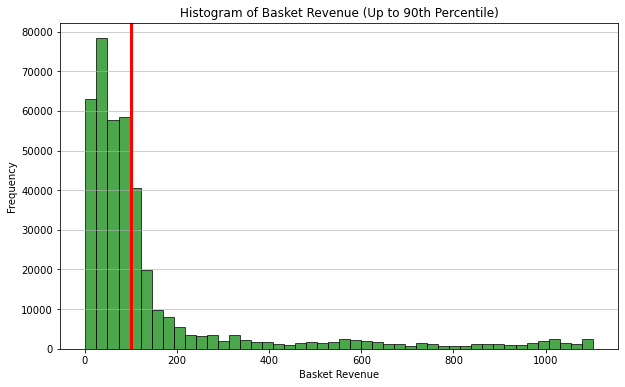

In [40]:
# Calculate the 0.90 percentile of the Basket Revenue to filter the data
percentile_90 = np.percentile(new_df['Basket Revenue'], 90)

# Filter the data to include only up to the 0.90 percentile
filtered_data = new_df[new_df['Basket Revenue'] <= percentile_90]['Basket Revenue']

# Plotting the filtered Basket Revenue histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_data, bins=46, color='green', alpha=0.7, edgecolor='black')
plt.title('Histogram of Basket Revenue (Up to 90th Percentile)')
plt.axvline(100, color='red', linewidth=3)
plt.xlabel('Basket Revenue')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Baskets with "100TL üzeri çatı" campaign are rounded up to 100TL for baskets that have lower 'Basket Revenue' than 100TL

In [49]:
# Create a different subset based on the given conditions
subset_df = new_df.copy()

# Apply conditions: if 'CAMPAIGN' equals "100 TL üzeri çatı" in any items and 'Basket Revenue' < 100, set 'Basket Revenue' to 100
subset_df['Basket Revenue'] = subset_df.apply(
    lambda row: 100 if any(c == "100 TL üzeri çatı" for c in row['CAMPAIGN']) and row['Basket Revenue'] < 100 else row['Basket Revenue'],
    axis=1)

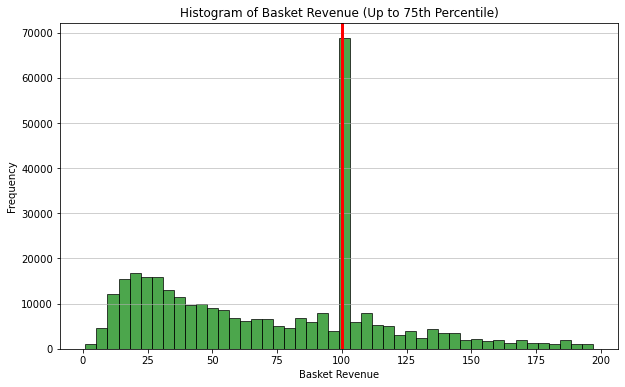

In [81]:
# Calculate the 0.75 percentile of the Basket Revenue to filter the data
percentile_75 = np.percentile(subset_df['Basket Revenue'], 75)

# Filter the data to include only up to the 0.90 percentile
filtered_data = subset_df[subset_df['Basket Revenue'] <= percentile_75]['Basket Revenue']

# Plotting the filtered Basket Revenue histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_data, bins=46, color='green', alpha=0.7, edgecolor='black')
plt.title('Histogram of Basket Revenue (Up to 75th Percentile)')
plt.axvline(100, color='red', linewidth=3)
plt.xlabel('Basket Revenue')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Baskets with "100TL üzeri çatı" campaign with below 100TL 'Basket Revenue' are removed from the dataset (58270 baskets are removed)

In [55]:
# Adjusting approach to remove orders where 'CAMPAIGN' equals "100 TL üzeri çatı" and 'Basket Revenue' < 100

# Assuming 'new_df' has already been processed up to calculating 'Basket Revenue'
# and we have a column 'CAMPAIGN' that lists campaigns for each 'ORDER_ID'

# Define a function to check the condition and flag rows for removal
def should_remove_order(row):
    campaign_condition = any("100 TL üzeri çatı" in campaign for campaign in row['CAMPAIGN'])
    revenue_condition = row['Basket Revenue'] < 100
    return campaign_condition and revenue_condition

# Apply the function and add a 'Remove Order' flag to the dataframe
new_df['Remove Order'] = new_df.apply(should_remove_order, axis=1)

# Filter out the rows flagged for removal
filtered_df = new_df[~new_df['Remove Order']]

# Drop the 'Remove Order' column as it's no longer needed
filtered_df = filtered_df.drop(columns=['Remove Order'])

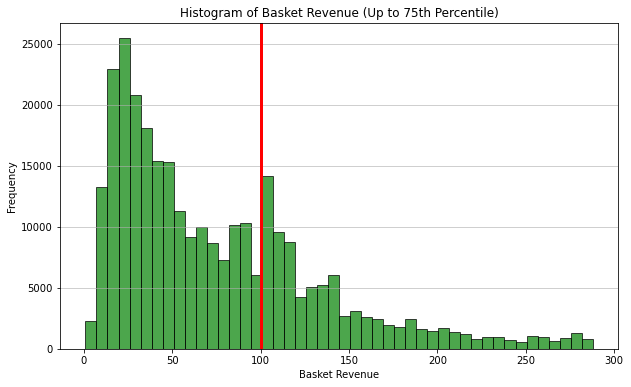

In [93]:
# Calculate the 0.75 percentile of the Basket Revenue to filter the data
percentile_75 = np.percentile(filtered_df['Basket Revenue'], 75)

# Filter the data to include only up to the 0.75 percentile
filtered_data = filtered_df[filtered_df['Basket Revenue'] <= percentile_75]['Basket Revenue']

# Plotting the filtered Basket Revenue histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_data, bins=46, color='green', alpha=0.7, edgecolor='black')
plt.title('Histogram of Basket Revenue (Up to 75th Percentile)')
plt.axvline(100, color='red', linewidth=3)
plt.xlabel('Basket Revenue')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [82]:
#58270/105021 # of removed baskets / # of baskets with "100 TL üzeri çatı" campaign

0.554841412669847

# Same percentage of data is randomly removed from baskets (other than "100 TL üzeri çatı")  to protect the distribution of the initial data

In [95]:
# Correcting the approach without using sum for concatenation

# Separate into two subsets without causing a TypeError
sample_df = filtered_df.copy()
contains_campaign = sample_df[sample_df['CAMPAIGN'].apply(lambda x: "100 TL üzeri çatı" in x)]
does_not_contain_campaign = sample_df[sample_df['CAMPAIGN'].apply(lambda x: "100 TL üzeri çatı" not in x)]

# Randomly remove 55.5% of the rows from the subset without the campaign
rows_to_keep = does_not_contain_campaign.sample(frac=1-0.555, random_state=492)

# Merge the two subsets back together
merged_df = pd.concat([contains_campaign, rows_to_keep]).sort_index()

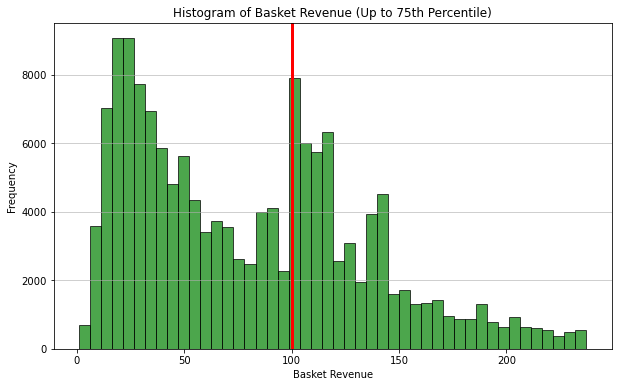

In [97]:
# Calculate the 0.75 percentile of the Basket Revenue to filter the data
percentile_75 = np.percentile(merged_df['Basket Revenue'], 75)

# Filter the data to include only up to the 0.75 percentile
filtered_data = merged_df[merged_df['Basket Revenue'] <= percentile_75]['Basket Revenue']

# Plotting the filtered Basket Revenue histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_data, bins=46, color='green', alpha=0.7, edgecolor='black')
plt.title('Histogram of Basket Revenue (Up to 75th Percentile)')
plt.axvline(100, color='red', linewidth=3)
plt.xlabel('Basket Revenue')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

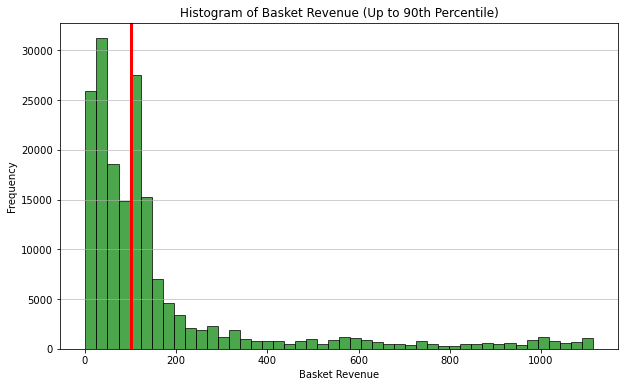

In [98]:
# Calculate the 0.90 percentile of the Basket Revenue to filter the data
percentile_90 = np.percentile(merged_df['Basket Revenue'], 90)

# Filter the data to include only up to the 0.75 percentile
filtered_data = merged_df[merged_df['Basket Revenue'] <= percentile_90]['Basket Revenue']

# Plotting the filtered Basket Revenue histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_data, bins=46, color='green', alpha=0.7, edgecolor='black')
plt.title('Histogram of Basket Revenue (Up to 90th Percentile)')
plt.axvline(100, color='red', linewidth=3)
plt.xlabel('Basket Revenue')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()